# compare_regressor

this notebook compares the regressor prediction results from **sklearn DecisionTreeRegressor & sklearn GradientBoostingRegressor** and our own python implementation **MyDecisionTreeRegressor & MyGrdientBoostingRegressor**.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline
np.random.seed(1)

## Decision Tree Regressor
### create regression dataset and visualize using pandas

In [3]:
from sklearn.datasets.samples_generator import make_regression

# create dataset with dim (n_samples, n_features), add some noise (std)
X, Y = make_regression(n_samples=100, n_features=6, noise=0.1, random_state=1)
pd.DataFrame(np.hstack((X, Y.reshape(-1,1))), columns=["feature " + str(i+1) for i in range(len(X[0]))] + ["Y"]).head()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,Y
0,-0.184176,0.617986,-0.933915,-0.115985,-0.175459,-0.533020,-21.262101
1,-0.661344,1.388779,0.654580,3.030857,0.824585,-0.051188,215.339300
2,-0.067410,-1.113436,1.746435,1.161440,-0.027529,-0.775070,16.364261
3,0.617203,0.120159,-1.142518,0.300170,-0.352250,-0.349343,-32.855250
4,-0.102887,0.840862,0.466643,1.146900,-0.049703,1.033687,132.709265


### train-test split using 0.8-0.2 ratio

In [4]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print("training data shape: {}".format(X_train.shape))
print("testing data shape: {}".format(X_test.shape))

training data shape: (80, 6)
testing data shape: (20, 6)


### train our regressor and predict on test data

In [5]:
from MyRegressor import MyDecisionTreeRegressor

# define a tree of depth 10
my_reg = MyDecisionTreeRegressor(max_depth=10, min_samples_split=2)

# train my regressor
my_reg.fit(X_train, Y_train)

# predict on test data 
my_pred = my_reg.predict(X_test)

### train a sklearn regressor and predict as well

In [6]:
from sklearn.tree import DecisionTreeRegressor

# try to keep the available hyperparameters same
sk_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=2)

# train sklearn regressor
sk_reg.fit(X_train, Y_train)

# predict on test data
sk_pred = sk_reg.predict(X_test)

### let's visualize the predictions

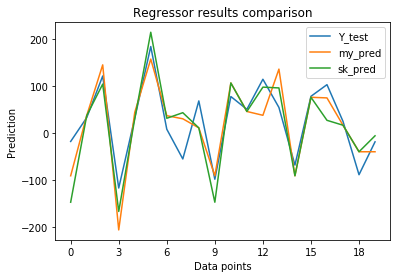

In [7]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(range(len(Y_test)), Y_test, label="Y_test")
plt.plot(range(len(my_pred)), my_pred, label="my_pred")
plt.plot(range(len(sk_pred)), sk_pred, label='sk_pred')
plt.title("Regressor results comparison")
plt.xlabel("Data points")
plt.ylabel("Prediction")
plt.legend()
plt.show()

`Our implementation has very comparable results with sklearn, although both could not predict perfectly yet (requires more hyperparameters tuning!) ` 

`Let's check out Gradient Boosting Regressors, which is ensemble decision tree regressor models!`

## Gradient Boosting Regressor

### Let's make a more interesting case for regression!

In [8]:
def math_function(x):
    return -x * np.cos(x) + np.sin(x)

def gen_data(n_samples):
    x = np.sort(np.random.uniform(0, 10, size=n_samples))
    return x, math_function(x) + np.random.normal(size=n_samples) * 0.5  # add some random noise

training data shape: (240,)
testing data shape: (60,)


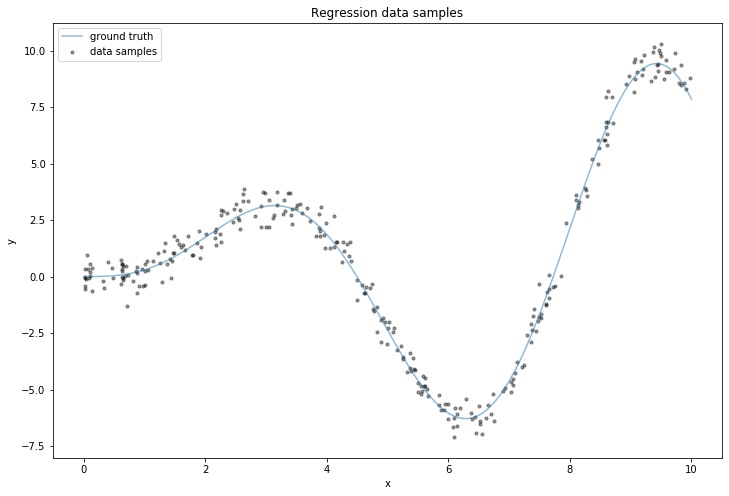

In [10]:
# generate 300 data sample and use 80% for training
X, Y = gen_data(300)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print("training data shape: {}".format(X_train.shape))
print("testing data shape: {}".format(X_test.shape))

# plot the data
x_for_plot = np.linspace(0, 10, 500)
fig = plt.figure(figsize=(12, 8))
plt.plot(x_for_plot, math_function(x_for_plot), alpha=0.5, label='ground truth')
plt.scatter(X, Y, s=10, alpha=0.4, color='black',label='data samples')
plt.legend()
plt.title("Regression data samples")
plt.ylabel('y')
plt.xlabel('x')
plt.show()

### Train our own Gradient Boosting Regressor, and predict on test data

In [11]:
from GBRegressor import MyGradientBoostingRegressor

my_gbr = MyGradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=10, min_samples_split=2)
my_gbr.fit(X_train.reshape(-1, 1), Y_train)  # note the reshape to column vector
my_gbr_pred = my_gbr.predict(X_test.reshape(-1, 1))

### Train a sklearn model (with almost same hyperparameters)

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

sk_gbr = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=10, min_samples_split=2)
sk_gbr.fit(X_train.reshape(-1, 1), Y_train)
sk_gbr_pred = sk_gbr.predict(X_test.reshape(-1, 1))

### Visualize regression results

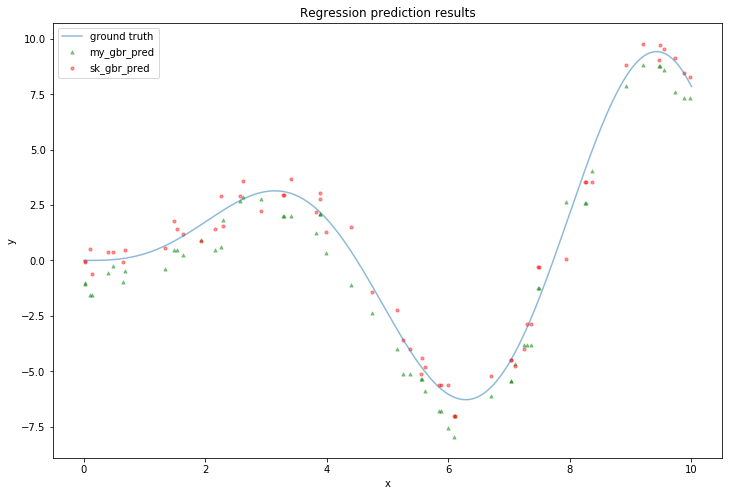

In [15]:
fig = plt.figure(figsize=(12, 8))
plt.plot(x_for_plot, math_function(x_for_plot), alpha=0.5, label='ground truth')
plt.scatter(X_test, my_gbr_pred, s=10, alpha=0.4, color='green', marker='^', label='my_gbr_pred')
plt.scatter(X_test, sk_gbr_pred, s=10, alpha=0.4, color='red', marker='o', label='sk_gbr_pred')
plt.legend()
plt.title("Regression prediction results")
plt.ylabel('y')
plt.xlabel('x')
plt.show()

`Our model trains slower, but performance is able to catch up!`